## Coding Problem #0601

### "NLP Classification Analysis."

#### Answer the following questions by providing Python code:
#### Objectives:
- Pre-processing of text data.
- Create a TF IDF representation.
- Carry out the predictive analysis using the Naive Bayes algorithm. 

In [1]:
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')               # Turn the warnings off.

#### Read in data:
Movie review data from Cornell CS department. <br>
- The data can be found [here](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Download the “polarity dataset” and unzip. <br>
- Under the "txt_sentoken” folder, there are “pos” and “neg" subfolders. <br>

In [4]:
# Specify the folder and read in the subfolders.
reviews = load_files('txt_sentoken/')
my_docs, y = reviews.data, reviews.target

In [5]:
len(my_docs)

2000

In [6]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1000, 1000], dtype=int64))

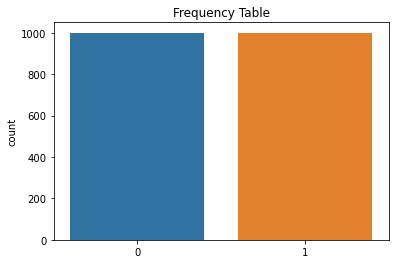

In [7]:
# Visualize the response variable.
sns.countplot(y).set_title("Frequency Table")
plt.show()

1). Carry out the data pre-processing:

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Latitude\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [20]:
#Clean the text
def clean_txt(txt):
# collecting english stop words from nltk-library
    stpw = set(stopwords.words('english'))
# using regex to clean the text
    txt = re.sub(r"\n", " ", txt)
    txt = re.sub("[\<\[].*?[\>\]]", " ", txt)
    txt = txt.lower()
    txt = re.sub(r"[^a-z ]", " ", txt)
    txt = re.sub(r"\b\w{1,3}\b", " ",txt)
    txt = " ".join([x for x in txt.split() if x not in stpw])
    return txt


In [33]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Latitude\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [34]:
from nltk.stem import WordNetLemmatizer
documents = []
stemmer = WordNetLemmatizer()


for sen in range(0, len(my_docs)):
     # Remove all the special characters
    document = re.sub(r'\W', ' ', str(my_docs[sen]))

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)

    documents.append(document)

In [35]:
print(documents[0])

arnold schwarzenegger ha been an icon for action enthusiast since the late 80 but lately his film have been very sloppy and the one liner are getting worse nit hard seeing arnold a mr freeze in batman and robin especially when he say ton of ice joke but hey he got 15 million what it matter to him nonce again arnold ha signed to do another expensive blockbuster that can compare with the like of the terminator series true lie and even eraser nin this so called dark thriller the devil gabriel byrne ha come upon earth to impregnate woman robin tunney which happens every 1000 year and basically destroy the world but apparently god ha chosen one man and that one man is jericho cane arnold himself nwith the help of trusty sidekick kevin pollack they will stop at nothing to let the devil take over the world nparts of this are actually so absurd that they would fit right in with dogma nyes the film is that weak but it better than the other blockbuster right now sleepy hollow but it make the wor

2). Create a TF IDF representation.

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000,stop_words=stopwords.words('english'))
my_docs = tfidfconverter.fit_transform(documents).toarray() 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(my_docs, y, test_size=0.2, random_state=0)
#divides data into 20% test set and 80% training set.

3). Apply the Naive Bayes algorithm. Calculate the accuracy.

In [43]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [57]:
#Create a Gaussian Classifier

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [55]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.745
